## Supplemental Analysis of SNe-heated Gas Particles 
`-- Leo Lonzarich, 27 September 2021 // [Updated 28-9-21] --`

<i>Supplementing work of Akins H. in 'Justice_League_Code/Analysis/RamPressure/RamPressure.ipynb'</i>


### Table of Contents
- [SN-assisted ram pressure stripping](#rampressure)
- [Exit Angles](#exitangle)
- [Mass Across Halos](#mass)
- [Physical Distribution](#distribution)

In [69]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import pandas as pd

# importing custom analysis package developed by Akins H.
#from analysis import *

from analysis import * 
#from importlib.machinery import SourceFileLoader
#analysis = SourceFileLoader('analysis', '/home/lonzaric/astro_research/Justice_League_Code/Analysis\
#/RamPressure/analysis

In [10]:
# fetching simulation 

h148 = pynbody.load('/home/lonzaric/astro_research/h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096')
h229 = pynbody.load('/home/lonzaric/astro_research/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
h242 = pynbody.load('/home/lonzaric/astro_research/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
h329 = pynbody.load('/home/lonzaric/astro_research/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

In [11]:
path = '/home/lonzaric/astro_research/ahdata/ram_pressure.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print('Available keys:', *keys)

Available keys: h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


In [12]:
key = 'h148_68'
data = pd.read_hdf(path, key=key)


data.head()

,t,a,h1dist,dNN,M_star,M_gas,satRvir,hostRvir,vel_CGM,rho_CGM,...,vel_CGM_adv,rho_CGM_adv,std_vel_CGM,std_rho_CGM,Pram_adv,Prest,SigmaGas,dphidz,SFR,sSFR
0,6.474131,0.537186,351.331723,136.542825,353055.2142765852,317398113.99134576,29.606109,177.866525,117.805868,254.657638,...,80.214662,336.1030937496534,20.216222,144.38385995677547,2162619.0640627374,2486911559.4075694,13509060.273913296,184.092121,0.001078,0.0
0,6.905111,0.563402,340.673585,159.329637,649876.2121450249,326006435.8591838,31.200604,188.949459,113.384304,318.040951,...,49.609608,484.37474852983325,28.349770,657.2014682161687,1192101.0726472647,2272863144.9099092,12499662.557453526,181.833960,0.001329,0.0
0,7.039793,0.571574,335.532759,166.459028,762722.2340452077,322406744.75504565,31.661600,192.398621,114.926786,566.132778,...,46.526214,525.6597004175386,33.693862,692.710307640118,1137889.538552329,2335742927.0570526,12005895.23652286,194.549668,0.001507,0.0
0,7.336092,0.589531,318.366170,181.075448,891713.8339198584,308099044.43497384,32.673718,200.539727,122.356171,288.198675,...,47.871046,768.2376652365205,40.390074,610.3646432242283,1760521.8917932329,1354706321.605477,10776335.221641326,125.711227,0.001075,0.0
0,7.767072,0.615628,281.066666,187.794063,1104622.53678891,268446465.61682206,34.510689,218.455662,134.636017,358.726353,...,97.791435,638.4036851493469,32.669110,468.3059163248729,6105159.647502371,1971941176.4242253,11741713.045249254,167.943227,0.001059,0.0


In [14]:
import warnings
warnings.filterwarnings("ignore")

data_all = read_all_ram_pressure()

1 Returning (ejected, cooled, expelled, accreted) for h148-13...
2 Returning (ejected, cooled, expelled, accreted) for h148-28...
3 Returning (ejected, cooled, expelled, accreted) for h148-37...
4 Returning (ejected, cooled, expelled, accreted) for h148-45...
5 Returning (ejected, cooled, expelled, accreted) for h148-68...
6 Returning (ejected, cooled, expelled, accreted) for h148-80...
7 Returning (ejected, cooled, expelled, accreted) for h148-283...
8 Returning (ejected, cooled, expelled, accreted) for h148-278...
9 Returning (ejected, cooled, expelled, accreted) for h148-329...
10 Returning (ejected, cooled, expelled, accreted) for h229-20...
11 Returning (ejected, cooled, expelled, accreted) for h229-22...
12 Returning (ejected, cooled, expelled, accreted) for h229-23...
13 Returning (ejected, cooled, expelled, accreted) for h229-27...
14 Returning (ejected, cooled, expelled, accreted) for h229-55...
15 Returning (ejected, cooled, expelled, accreted) for h242-24...
16 Returning (ej

In [6]:
# importing simulation 

#h148 = pynbody.load('../h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096')
#h229 = pynbody.load('../h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
#h242 = pynbody.load('../h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
#h329 = pynbody.load('../h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

In [8]:
# halo numbers for halos with stars in them and fMhires > 0.9 [updated 09-08-21]

#nums_h148 = [1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 21, 24, 27, 28, 30, 32, 36, 37, 41, 45, 47, 48, 58, 61, 65, 68, 80, 81, 96, 105, 119, 127, 128, 136, 163, 212, 265, 278, 283, 329, 372, 377, 384, 386, 442, 491, 620, 678, 699, 711, 759, 914, 1004, 1024, 1201, 1217, 1451, 2905, 5039]
#nums_h229 = [1, 2, 5, 7, 17, 20, 22, 23, 27, 29, 33, 52, 53, 55, 59, 61, 62, 73, 104, 113, 139, 212, 290, 549, 1047, 1374, 1483, 1558, 6045]
#nums_h242 = [1, 10, 12, 24, 30, 34, 40, 41, 44, 48, 49, 71, 78, 80, 86, 165, 223, 439, 480, 1872, 2885, 6054, 9380, 10426, 12297]
#nums_h329 = [1, 11, 31, 33, 40, 64, 103, 133, 137, 146, 185, 447, 729, 996, 1509]

## From RamPressure: 
_______________
_______________

### How does SN-heating affect ram pressure stripping? <a class="anchor" id="rampressure"></a>

In [9]:
ratios_sne, N_e_sne, N_p_sne, E_prob_sne = np.array([]),np.array([]),np.array([]),np.array([])

for key in np.unique(data_all.key):
    # SNe-affected, currently or in last {t_thresh} Gyr
    t_thresh = 0.5 

    d = data_all[data_all.key==key]
    expelled = pd.read_hdf(f'/home/lonzaric/astro_research/ahdata/expelled_particles.hdf5', key=key)
    expelled = expelled[expelled.coolontime > expelled.time - t_thresh]
    particles = read_tracked_particles(key[:4],int(key[5:]))
    particles = particles[(particles.in_sat)&(particles.coolontime > particles.time - t_thresh)]

    expelled_grp = expelled.groupby(['time']).pid.count().reset_index()
    expelled_grp = expelled_grp.rename(columns={'pid':'N_e'})
    particles_grp = particles.groupby(['time']).pid.count().reset_index()
    particles_grp = particles_grp.rename(columns={'pid':'N_p'})

    d = pd.merge(d.sort_values('t'), expelled_grp.sort_values('time'), left_on='t', right_on='time', how='left')
    d = pd.merge(d.sort_values('t'), particles_grp.sort_values('time'), left_on='t', right_on='time', how='left')

    times = np.unique(d.time)
    ratios1 = np.array(d.ratio)
    N_e1 = np.array(d.N_e)[1:]
    N_p1 = np.array(d.N_p)[:-1]
    E_prob1 = N_e1/N_p1
    ratios1 = ratios1[1:]

    ratios_sne = np.append(ratios_sne,ratios1)
    N_e_sne = np.append(N_e_sne, N_e1)
    N_p_sne = np.append(N_p_sne, N_p1)
    E_prob_sne = np.append(E_prob_sne, E_prob1)

In [10]:
cond_sne = ~np.isnan(E_prob_sne) & ~np.isinf(E_prob_sne)
ratios_sne = ratios_sne[cond_sne]
N_e_sne = N_e_sne[cond_sne]
N_p_sne = N_p_sne[cond_sne]
E_prob_sne = E_prob_sne[cond_sne]

bins = np.append(np.arange(-4,2,1),2.2)
bc = 0.5*(bins[1:] + bins[:-1])
E_prob_median_sne, E_prob_weighted_sne, E_prob_weighted_log_sne, std_sne = np.array([]),np.array([]),\
    np.array([]),np.array([])

for left_edge, right_edge in zip(bins[:-1],bins[1:]):
    cond = (np.log10(ratios_sne) >= left_edge) & (np.log10(ratios_sne) < right_edge)
    E_prob_weighted_sne = np.append(E_prob_weighted_sne,np.average(E_prob_sne[cond], weights=N_p_sne[cond]))
    E_prob_weighted_log_sne = np.append(E_prob_weighted_log_sne,np.average(E_prob_sne[cond], weights=\
        np.log10(N_p_sne)[cond]))
    E_prob_median_sne = np.append(E_prob_median_sne,np.median(E_prob_sne[cond]))
    std_sne = np.append(std_sne, np.std(E_prob_sne[cond]))

### Probability of expulsion by ram pressure for sne-heated gas

Recall that the pressure ratio used here is defined to be $\mathcal{P} \equiv P_{\rm ram}/P_{\rm rest}$. 

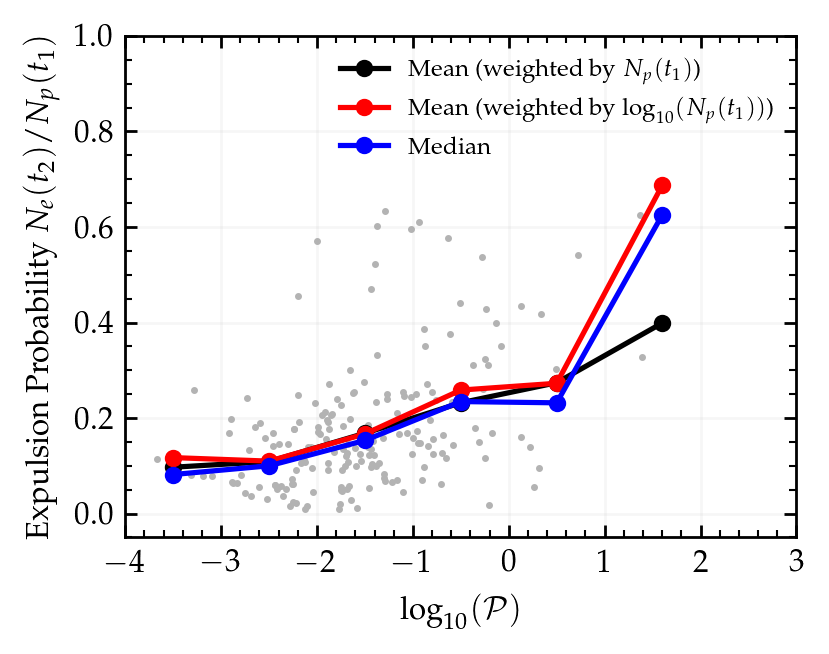

In [11]:
fig, ax = plt.subplots(1,1,dpi=250, figsize=(3.2,2.5), constrained_layout=True)

ax.scatter(np.log10(ratios_sne), E_prob_sne, c='0.7', s=1)
ax.plot(bc, E_prob_weighted_sne, 'ko-', ms=4, label=r'Mean (weighted by $N_p(t_1)$)')
ax.plot(bc, E_prob_weighted_log_sne, 'ro-', ms=4, label=r'Mean (weighted by $\log_{10}(N_p(t_1))$)')
ax.plot(bc, E_prob_median_sne, 'bo-', ms=4, label='Median')

ax.legend(frameon=False, fontsize=7)
ax.set_xlabel(r'$\log_{10}(\mathcal{P})$')
ax.set_ylabel(r'Expulsion Probability $N_{e}(t_2)/N_{p}(t_1)$')
ax.set_xlim(-4, 3)
ax.set_ylim(-0.05, 1)
ax.tick_params(direction='in', which='both', top=True, right=True)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.grid(alpha=0.1, zorder=-1000)
plt.show()

What do the units of the vertical mean? why do we have so few points for greater $\mathcal{P}$?

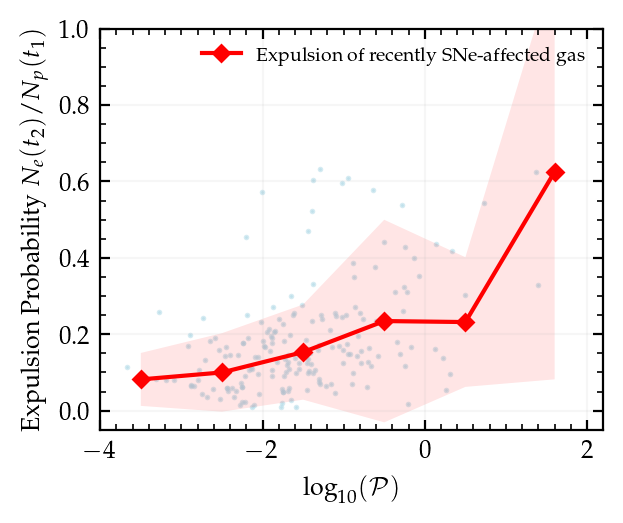

In [26]:
 fig, ax = plt.subplots(1,1,dpi=200, figsize=(3,2.5), sharex=True)

ax.scatter(np.log10(ratios_sne), E_prob_sne, c='lightblue', s=1, alpha=0.5)
ax.fill_between(bc, E_prob_median_sne-std_sne, E_prob_median_sne+std_sne, color='r', ec=None, alpha=0.1)
ax.plot(bc, E_prob_median_sne, 'rD-', ms=4, label=r'Expulsion of recently SNe-affected gas')

ax.legend(frameon=False, fontsize=7)
ax.set_xlabel(r'$\log_{10}(\mathcal{P})$')
ax.set_ylabel(r'Expulsion Probability $N_{e}(t_2)/N_{p}(t_1)$')
ax.set_xlim(-4, 2.2)
ax.set_ylim(-0.05, 1)
ax.tick_params(direction='in', which='both', top=True, right=True)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.grid(alpha=0.1, zorder=-1000)

plt.show()

## From ExitAngle: <a class="anchor" id="exitangle"></a>

____
____

### Examining Fraction of Expelled and Ejected SN-heated gas and the angles at which it exits the bulk.

In the proceeding, we will make the following distinctions:
- 'Expelled' gas refers to those gas particles that have been removed from the halo disk;
- 'Ejected' gas then refers to the gas particles entirely removed from the satellite;


In [120]:
ejected, cooled, expelled, accreted = read_all_ejected_expelled()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
Returning (ejected, cooled, expelled, accreted) for all available satellites...


In [121]:
# constructing bins for 
N = 20
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

In [122]:
ejected['weight'] = ejected['mass'] / ejected['mass'].sum()
expelled['weight'] = expelled['mass'] / expelled['mass'].sum()

In [183]:
cond = ejected.coolontime > ejected.time
hot_ejected = ejected[cond]

cond = expelled.coolontime > expelled.time
hot_expelled = expelled[cond]

hot_ejected[['coolontime', 'time']];
hot_expelled[['coolontime', 'time']];

# displaying data for ejected gas, with expelled gas below.
display(hot_ejected[['coolontime', 'time']], hot_expelled[['coolontime', 'time']])

,coolontime,time
196,7.067249,7.039793
268,8.208670,8.198053
299,6.910682,6.905111
299,9.512551,9.490994
309,8.206920,8.198053
...,...,...
4036,7.467925,7.443837
4136,8.748708,8.736778
4164,7.776008,7.767072
4226,7.794526,7.767072


,coolontime,time
131,12.173343,12.150951
168,10.770135,10.767100
252,6.928359,6.905111
277,10.373126,10.352954
309,6.930042,6.905111
...,...,...
3832,7.446983,7.443837
3971,7.794526,7.767072
4123,7.771502,7.767072
4335,7.779375,7.767072


KeyError: ('temp', 'time')

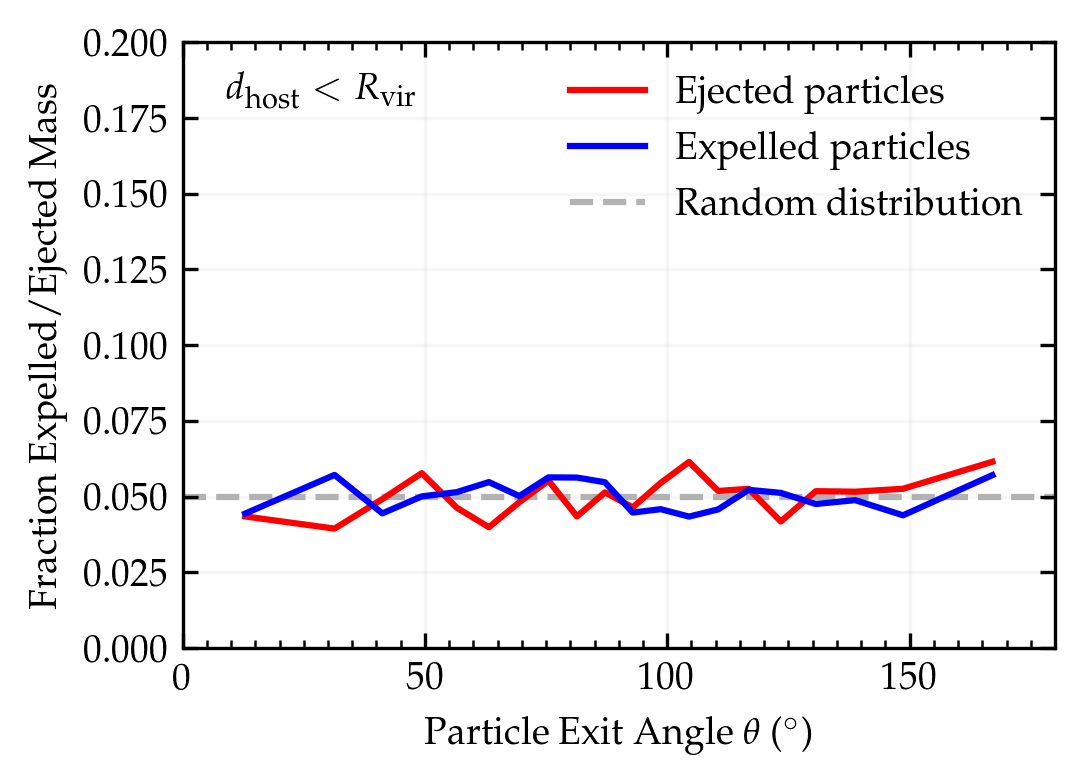

In [174]:
# setting up condition arguments to limit the gas particles we select to those within the virial radius of the satellite; 
# any gas outside of this range we would not classify as belonging to the satellite, and is, thereby, irrelivant to our
# study.
sat_pos = np.array([np.array(hot_ejected.sat_Xc), np.array(hot_ejected.sat_Yc), np.array(hot_ejected.sat_Zc)]).T
host_pos = np.array([np.array(hot_ejected.host_Xc), np.array(hot_ejected.host_Yc), np.array(hot_ejected.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag1 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag1 /= np.array(hot_ejected.hostRvir)

sat_pos = np.array([np.array(hot_expelled.sat_Xc), np.array(hot_expelled.sat_Yc), np.array(hot_expelled.sat_Zc)]).T
host_pos = np.array([np.array(hot_expelled.host_Xc), np.array(hot_expelled.host_Yc), np.array(hot_expelled.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag2 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag2 /= np.array(hot_expelled.hostRvir)


def weight(x, cond=':'):
    # computes weights for each particle; reducing clutter.
    # 'cond' = optional conditions, 'x' = array of attributes.
    return x[cond]/np.sum(x[cond])

    
# plotting.
fig, ax = plt.subplots(1,1,dpi=300, figsize=(3.5,2.5), constrained_layout=True)

# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
cond = pos_mag1 < 1
y1, bins = np.histogram(hot_ejected.angle[cond], bins=bins, weights=weight(hot_ejected.mass, cond))
ax.plot(bincenters, y1, label='Ejected particles', c='r')

cond = pos_mag2 < 1
y2, bins = np.histogram(hot_expelled.angle[cond], bins=bins, weights=weight(hot_expelled.mass, cond))
ax.plot(bincenters, y2, label='Expelled particles', c='b')

# line representing random distribution.
percent = 1/N
ax.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='Random distribution')

ax.legend(frameon=False)

# labels, axis scaling, etc.
ax.set_xlabel(r'Particle Exit Angle $\theta$ ($^\circ$)')
ax.set_ylabel('Fraction Expelled/Ejected Mass')
ax.set_xlim(0,180)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
#ax.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.1, zorder=-1000)
ax.annotate(r'$d_{\rm host} < R_{\rm vir}$', (0.05, 0.95), xycoords='axes fraction', va='top')

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

It would appear from the plot above that there SN-heated gas favors no particular exit angle, and is instead ejected/expelled nearly equally across a range of angles.


### Examining Exit Angles by Distance.

In [188]:
ejected, cooled, expelled, accreted = read_all_ejected_expelled()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
Returning (ejected, cooled, expelled, accreted) for all available satellites...


In [168]:
N = 20 # more bins than Bahé et al since we have lots of particles
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

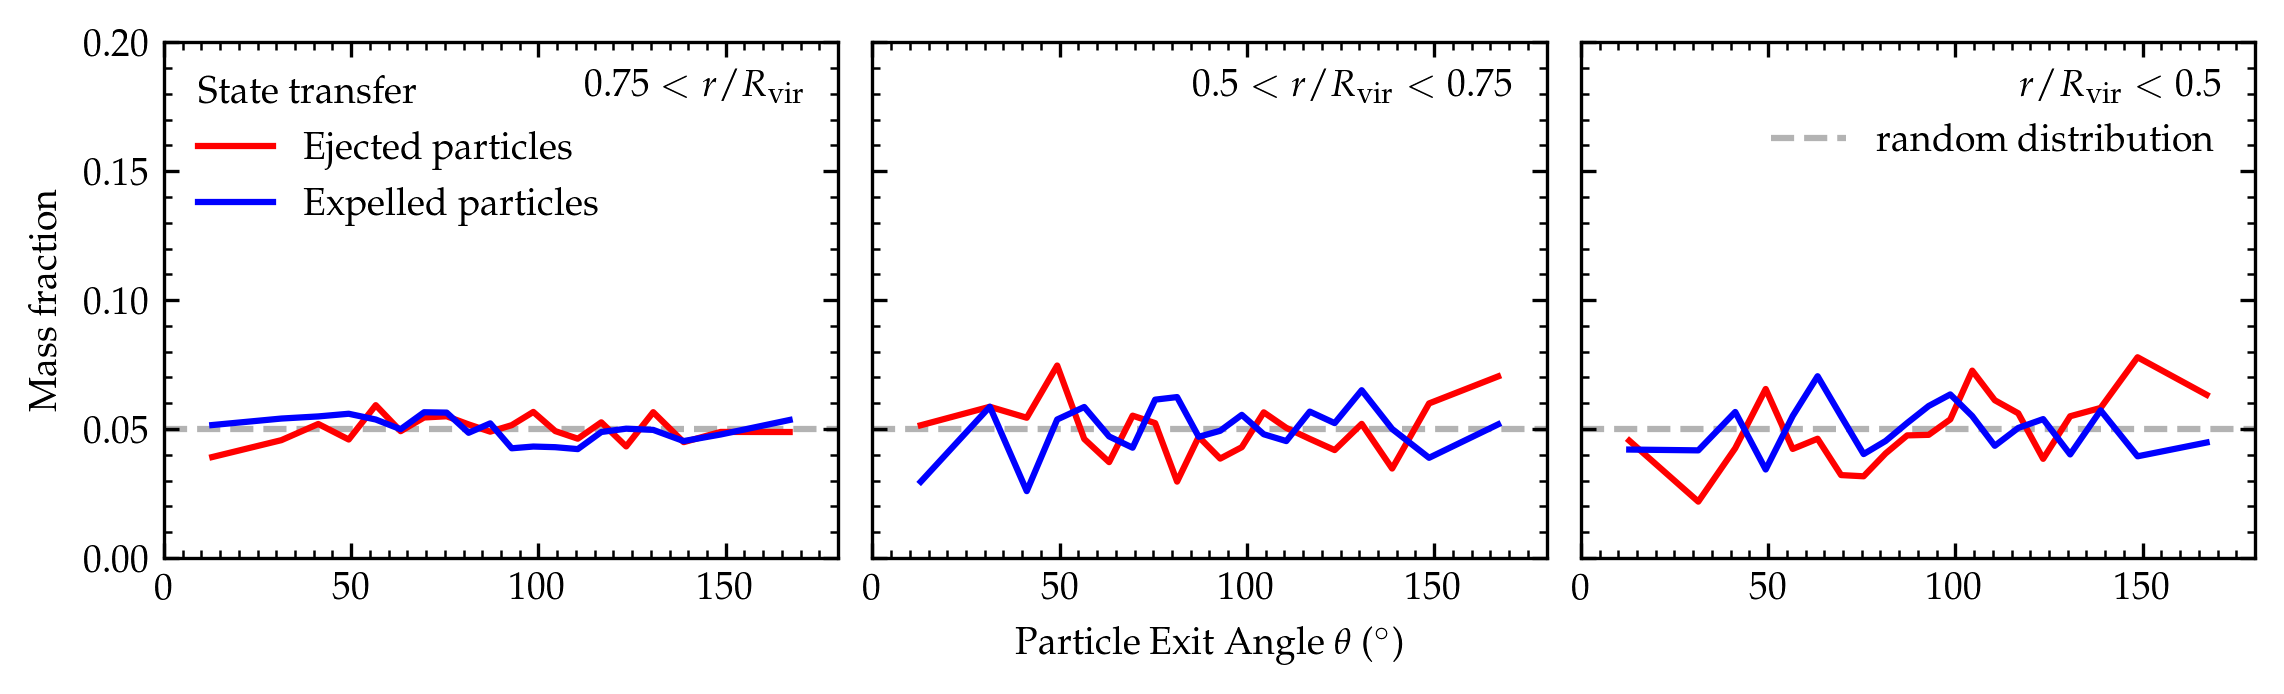

In [240]:
sat_pos = np.array([np.array(hot_ejected.sat_Xc), np.array(hot_ejected.sat_Yc), np.array(hot_ejected.sat_Zc)]).T
host_pos = np.array([np.array(hot_ejected.host_Xc), np.array(hot_ejected.host_Yc), np.array(hot_ejected.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag1 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag1 /= np.array(hot_ejected.hostRvir)

sat_pos = np.array([np.array(hot_expelled.sat_Xc), np.array(hot_expelled.sat_Yc), np.array(hot_expelled.sat_Zc)]).T
host_pos = np.array([np.array(hot_expelled.host_Xc), np.array(hot_expelled.host_Yc), np.array(hot_expelled.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag2 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag2 /= np.array(hot_expelled.hostRvir)

fig,ax = plt.subplots(1,3, dpi=300, figsize=(7.5,2.2), sharey=True)



# left plot will be for r > 0.75
ax[0].annotate(r'$0.75 < r/R_{\rm vir}$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = pos_mag1 >= 0.75
y1, bins = np.histogram(hot_ejected.angle[cond], bins=bins, weights=weight(hot_ejected.mass,cond))
l1 = r'Ejected particles'
ax[0].plot(bincenters, y1, label=l1, color='r')

cond = pos_mag2 > 0.75
y2, bins = np.histogram(hot_expelled.angle[cond], bins=bins, weights=weight(hot_expelled.mass,cond))
l2 = r'Expelled particles'
ax[0].plot(bincenters, y2, label=l2, color='b')



# middle plot will be for 0.5 < r < 0.75
ax[1].annotate(r'$0.5 < r/R_{\rm vir} < 0.75$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = (pos_mag1 >= 0.5) & (pos_mag1 < 0.75)

y1, bins = np.histogram(hot_ejected.angle[cond], bins=bins, weights=weight(hot_ejected.mass,cond))
ax[1].plot(bincenters, y1, color='r')

cond = (pos_mag2 >= 0.5) & (pos_mag2 < 0.75)
y2, bins = np.histogram(hot_expelled.angle[cond], bins=bins, weights=weight(hot_expelled.mass,cond))
ax[1].plot(bincenters, y2, color='b')



# right plot will be r < 0.5
ax[2].annotate(r'$r/R_{\rm vir} < 0.5$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = pos_mag1 < 0.5
y1, bins = np.histogram(hot_ejected.angle[cond], bins=bins, weights=weight(hot_ejected.mass,cond))
ax[2].plot(bincenters, y1, color='r')

cond = pos_mag2 < 0.5
y2, bins = np.histogram(hot_expelled.angle[cond], bins=bins, weights=weight(hot_expelled.mass,cond))
ax[2].plot(bincenters, y2, color='b')



# plot the line that represents a random distribution
percent = 1/N
ax[0].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[1].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[2].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='random distribution')

# add legends
leg1 = ax[0].legend(title='State transfer', loc='upper left')
leg1._legend_box.align = 'left'
ax[2].legend(loc=(0.26,0.74))

# labels and ticks and such
ax[1].set_xlabel(r'Particle Exit Angle $\theta$ ($^\circ$)')
ax[0].set_ylabel('Mass fraction')
for a in ax:
    a.set_xlim(0,180)
    a.set_ylim(0,0.2)

    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# plt.savefig('plots/theta_allsats_byR.pdf')
plt.show()

Note that $r/R_{vir}$ represents the percent distance of the virial radius of the satellite. For example, the leftmost plot gives exit angles of gas particles existing at radial distances greater than $0.75R_{vir}$ from the center of the satellite.

We again see that there are no well-defined patterns in exit angles to be gleaned by looking at different radial ranges. What might be noted, however, is that for the gas particles at radial positions $>0.75R_{vir}$, mass is far more evenly ejected/expelled across the range of exit angles. Below $0.75R_{vir}$, the distribution is much more erratic. 

### Examining Exit Angles by Temperature.

In [289]:
ejected, cooled, expelled, accreted = read_all_ejected_expelled()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
Returning (ejected, cooled, expelled, accreted) for all available satellites...


In [291]:
N = 20 # more bins than Bahé et al since we have lots of particles
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

In [279]:
hot_ejected.temp.describe()

count      3458.000000
mean      44286.093439
std       48050.437921
min        1380.869995
25%       16460.891602
50%       26240.503906
75%       48801.511719
max      398943.750000
Name: temp, dtype: float64

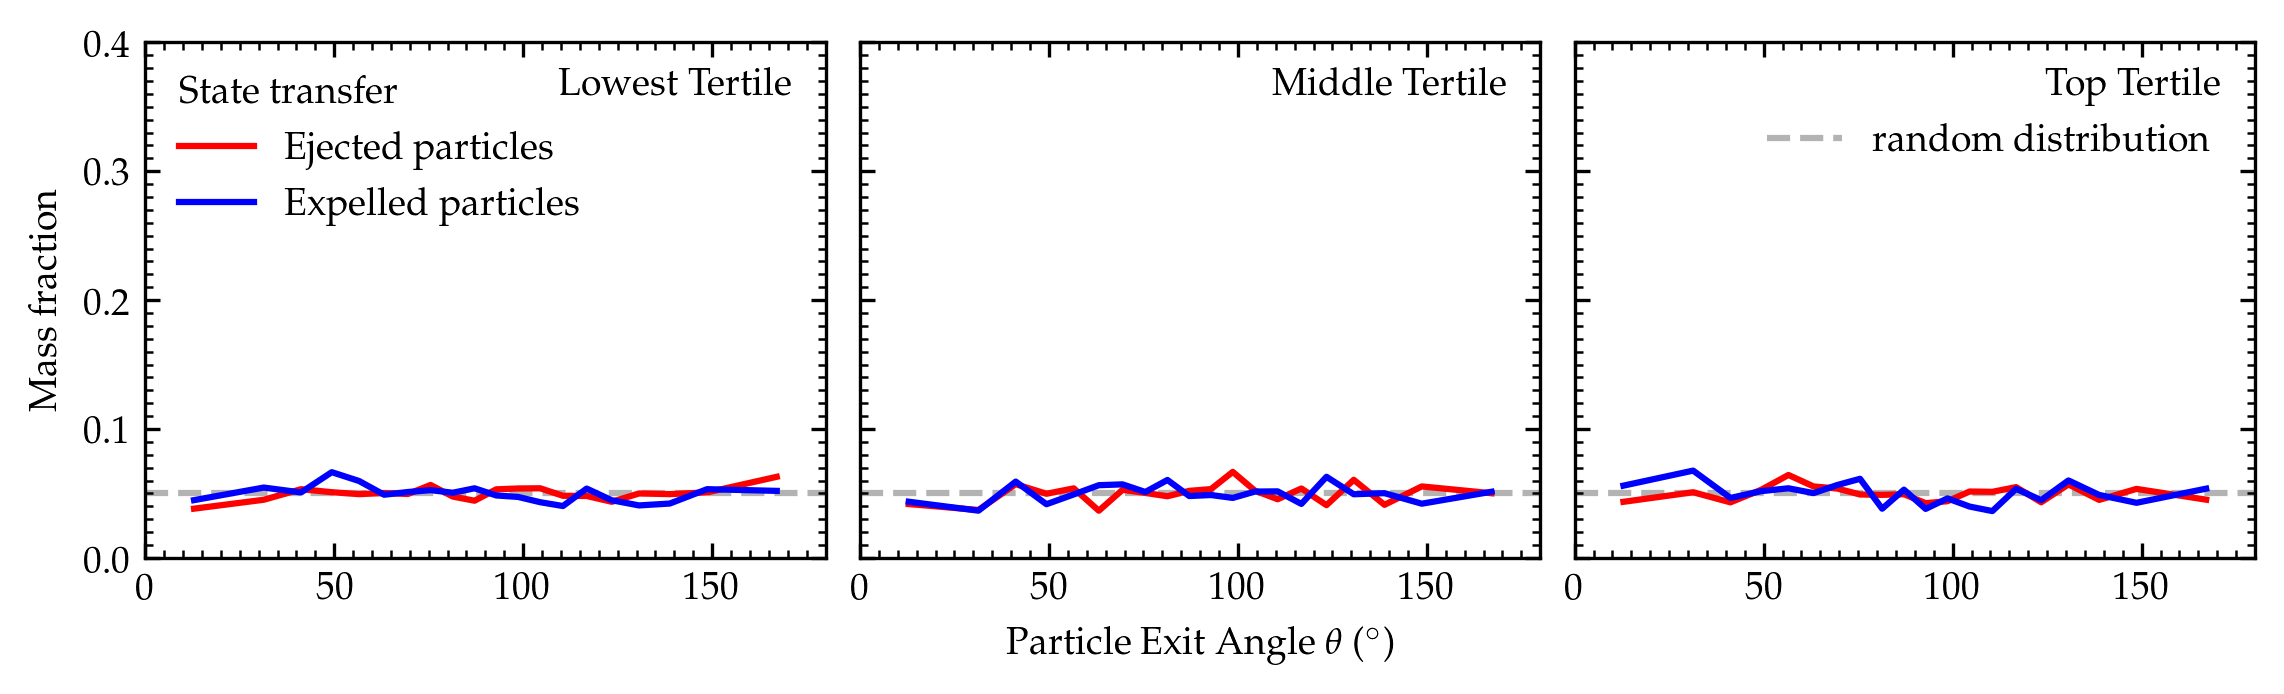

In [288]:
# creating two-entry arrays for temp condition; position '0' corresponds to ejected gas, '1' corresponds to expelled gas.
temps = [hot_ejected.temp, hot_expelled.temp]

cutoffLow = [np.percentile(temps[0], 33), np.percentile(temps[1], 33)]
cutoffMid = [np.percentile(temps[0], 66), np.percentile(temps[1], 66)]

cond1 = [temps[0] < cutoffLow[0], temps[1] < cutoffLow[1]]
cond2 = [(temps[0] >= cutoffLow[0]) & (temps[0] < cutoffMid[0]),(temps[1] >= cutoffLow[1]) & (temps[1] < cutoffMid[1])]
cond3 = [temps[0] >= cutoffMid[0], temps[1] >= cutoffMid[1]]


fig,ax = plt.subplots(1,3, dpi=300, figsize=(7.5,2.2), sharey=True)



# left plot will be for lowest 33% of temps.
ax[0].annotate(r'Lowest Tertile',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')

y1, bins = np.histogram(hot_ejected.angle[cond1[0]], bins=bins, weights=weight(hot_ejected.mass,cond1[0]))
l1 = r'Ejected particles'
ax[0].plot(bincenters, y1, label=l1, color='r')

y2, bins = np.histogram(hot_expelled.angle[cond1[1]], bins=bins, weights=weight(hot_expelled.mass,cond1[1]))
l2 = r'Expelled particles'
ax[0].plot(bincenters, y2, label=l2, color='b')



# middle plot will be for middle 33% of temps
ax[1].annotate(r'Middle Tertile',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')

y1, bins = np.histogram(hot_ejected.angle[cond2[0]], bins=bins, weights=weight(hot_ejected.mass,cond2[0]))
ax[1].plot(bincenters, y1, color='r')

y2, bins = np.histogram(hot_expelled.angle[cond2[1]], bins=bins, weights=weight(hot_expelled.mass,cond2[1]))
ax[1].plot(bincenters, y2, color='b')



# right plot will be for top 33% of temps.
ax[2].annotate(r'Top Tertile',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')

y1, bins = np.histogram(hot_ejected.angle[cond3[0]], bins=bins, weights=weight(hot_ejected.mass,cond3[0]))
ax[2].plot(bincenters, y1, color='r')

y2, bins = np.histogram(hot_expelled.angle[cond3[1]], bins=bins, weights=weight(hot_expelled.mass,cond3[1]))
ax[2].plot(bincenters, y2, color='b')




# plot the line that represents a random distribution
percent = 1/N
ax[0].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[1].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[2].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='random distribution')

# add legends
leg1 = ax[0].legend(title='State transfer', loc='upper left')
leg1._legend_box.align = 'left'
ax[2].legend(loc=(0.26,0.74))

# labels and ticks and such
ax[1].set_xlabel(r'Particle Exit Angle $\theta$ ($^\circ$)')
ax[0].set_ylabel('Mass fraction')
for a in ax:
    a.set_xlim(0,180)
    a.set_ylim(0,0.4)

    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# plt.savefig('plots/theta_allsats_byR.pdf')
plt.show()

For this case, we see negligible differentiation when screening for the temperature of the SN-heated gas particles.